In [45]:
# Pavlo Sharhan 
# BS 83
# KP-6

In [46]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [47]:
#1. Обрати реальні дані з kaggle або сгенерувати випадкові дані. Дані мають відповідати вимогам. 

In [48]:
data = pd.read_csv("MEGSignal(Audio&VisualStimulus).csv") #Сигнал MEG при звуковому та візуальному подразнику

In [49]:
data

,Unnamed: 0,AudioStimulus,VisualStimulus
0,3000,184.942,197.640
1,3001,184.964,156.942
2,3002,200.850,173.940
3,3003,190.754,203.584
4,3004,181.552,169.596
...,...,...,...
295,3295,196.420,163.506
296,3296,197.410,201.310
297,3297,181.278,182.234
298,3298,189.770,155.690


In [50]:
# 2. Побудувати графік, що відображає розкид даних в групах

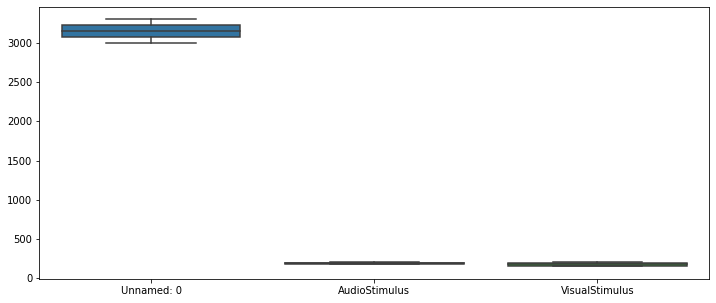

In [51]:
fig, ax = plt.subplots(figsize=(12,5))
fig =  sns.boxplot(data = data)

In [52]:
# 3.для оцінки зв'язку між групами за коефіцієнтом кореляції Пірсона. 
#Функція має повертати значення коефіцієнту кореляції, значення ступеня
#свободи та результат оцінки значимості зв'зку (significant або not significant). 

In [53]:
def cor_pirson(data):
    r_t = len(data)*(sum(data.iloc[:,0]*data.iloc[:,1])) - sum(data.iloc[:,0])*sum(data.iloc[:,1])
    r_b = (len(data)*sum(data.iloc[:,0]**2) - sum(data.iloc[:,0])**2)*(len(data)*sum(data.iloc[:,1]**2) - sum(data.iloc[:,1])**2)
    r = r_t/np.sqrt(r_b)
    
    table_kor = pd.read_excel("table-kor-values.xlsx",encoding = 'utf-8')    #Таблица корреляционных значений
    
    df = len(data)-2
    table_val = 0
    if(df < 130):
        for i in range(len(table_kor)):
            if(df < int(table_kor.iloc[i,0])):
                if(df != table_kor.iloc[i-1,0]):
                    table_val = (table_kor.iloc[i-1,1] if((table_kor.iloc[i,0]-df) >= abs(table_kor.iloc[i-1,0]-df)) else table_kor.iloc[i,1])
                    break
                else:
                    table_val = table_kor.iloc[i-1,1]
                    break
    else:
        table_val = table_kor.iloc[36,1]
    significant = "significant" if(abs(r) > table_val) else "not significant"
    return r,df,significant
    

In [54]:
result_pirson = cor_pirson(data)
result_pirson

(-0.004457187788863379, 298, 'not significant')

In [55]:
#4.для визначення відмінності між групами за критерієм Стьюдента.
#Функція має повертати значення критерію Стьюдента,значення ступеня
#свободи та результат оцінки значимості зв'зку (significant або not significant).

In [56]:
def student(data):
    data["Різниця"] = data.iloc[:,0]-data.iloc[:,1]
    M = np.mean(data.iloc[:,2])
    st = np.std(data.iloc[:,2])
    t = (M/st) * np.sqrt(len(data))
    df = len(data)-1
    
    
    table_values = pd.read_excel("table-paired-values.xlsx",encoding = 'utf-8')    #Таблица корреляционных значений
    
    table_val = 0
    for i in range(len(table_values)):
        if(df < int(table_values.iloc[i,0])):
            if(df != table_values.iloc[i-1,0]):
                table_val = (table_values.iloc[i-1,1] if((table_values.iloc[i,0]-df) >= abs(table_values.iloc[i-1,0]-df)) else table_values.iloc[i,1])
                break
            else:
                table_val = table_values.iloc[i-1,1]
                break
                
    significant = "significant" if(t < table_val) else "not significant"
    return t,df,significant
    

In [57]:
result_student = student(data)
result_student

(174.77376100313458, 299, 'not significant')

In [58]:
# 5.Перевірити розбіжність на між групами на даних з п. 1

In [59]:
table = pd.DataFrame({
    "Критерій Пірсона":result_pirson,
    "Критерій Стьюдента":result_student
}, index = ["Значення", "ступінь свободи", "Значимість зв'язку"])
table

,Критерій Пірсона,Критерій Стьюдента
Значення,-0.00445719,174.774
ступінь свободи,298,299
Значимість зв'язку,not significant,not significant


In [60]:
# 6. Сформувати висновок про взаємозв'язок між групами та про їх розбіжність. 

In [61]:
if(table.iloc[2,0] == "significant"):
    print("Статистично значимий зв'язок ")
else:
    print("Зв'язку немає")
          
if(table.iloc[2,1] == "significant"):
    print("Парні групи рівні")
else:
    print("Парні групи різняться")

Зв'язку немає
Парні групи різняться
